In [1]:
#Requirements
!pip install emnist
!pip install python-mnist

In [2]:
#Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
from emnist import extract_test_samples
from emnist import extract_training_samples
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


(28, 28)
1


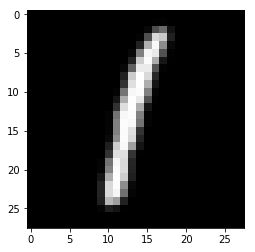

In [3]:
#Data Pre- Processing
x_train, y_train= extract_training_samples('bymerge')
x_test, y_test =extract_test_samples('bymerge')
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_labels = y_train
test_labels = y_test

print(x_train[0].shape)

x_train = x_train.reshape(697932,1,28,28)
x_test = x_test.reshape(116323,1,28,28)

plt.imshow(x_train[7][0], cmap= 'gray')
print(y_train[7])

In [0]:
#Arrangement in Categorical way(By Merge)
y_train = to_categorical(y_train, 47)
y_test = to_categorical(y_test, 47)

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(47, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=3,validation_split=0.2, shuffle=True)
model.save('emnist_model.h5')

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = score[1]*100
print('Accuracy: %.2f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 47)                24111     
Total params: 688,687
Trainable params: 688,687
Non-trainable params: 0
_________________________________________________________________
Trai

In [0]:
from google.colab import files
files.download('emnist_model.h5')